2400 1080
(1080, 2400)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
(1080, 2400)


(-0.5, 2399.5, 1079.5, -0.5)

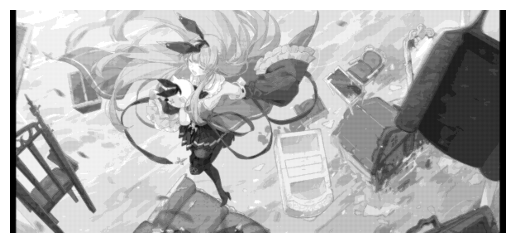

In [ ]:
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import numpy as np
img=Image.open('kou.jpg')
img=ImageOps.grayscale(img)#imageOps提供轉灰階的函數
width,height=img.size
print(width,height)
OriginalImage=np.asarray(img)#use numpy to read image to 2 dimension matrix
HalfToneImage = np.zeros((height,width), dtype=np.uint8)
print(OriginalImage.shape)
print(OriginalImage)
print(type(HalfToneImage))
print(HalfToneImage.shape)
define_block = [
    [[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]],
    [[1, 1, 1, 1], [1, 1, 0, 1], [1, 1, 1, 1], [1, 1, 1, 1]],
    [[1, 1, 1, 1], [1, 1, 0, 1], [1, 1, 0, 1], [1, 1, 1, 1]],
    [[1, 1, 1, 1], [1, 0, 0, 1], [1, 1, 0, 1], [1, 1, 1, 1]],
    [[1, 1, 1, 1], [1, 0, 0, 1], [1, 0, 0, 1], [1, 1, 1, 1]],
    [[1, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [1, 1, 1, 1]],
    [[1, 1, 1, 1], [1, 0, 0, 0], [0, 0, 0, 1], [1, 1, 1, 1]],
    [[1, 1, 1, 1], [1, 0, 0, 0], [0, 0, 0, 1], [1, 1, 0, 1]],
    [[1, 0, 1, 1], [1, 0, 0, 0], [0, 0, 0, 1], [1, 1, 0, 1]],
    [[0, 0, 0, 0], [0, 1, 1, 1], [1, 1, 1, 0], [0, 0, 1, 0]],
    [[0, 0, 0, 0], [0, 1, 1, 1], [1, 1, 1, 0], [0, 0, 0, 0]],
    [[0, 0, 0, 0], [0, 1, 1, 1], [0, 1, 1, 0], [0, 0, 0, 0]],
    [[0, 0, 0, 0], [0, 1, 1, 0], [0, 1, 1, 0], [0, 0, 0, 0]],
    [[0, 0, 0, 0], [0, 1, 1, 0], [0, 0, 1, 0], [0, 0, 0, 0]],
    [[0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 0]],
    [[0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0]],
    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]],
]
block_gray=[]
sum=0
for i in range(17):#0-16
  sum=0
  for j in range(4):
    for k in range(4):
      if(define_block[i][j][k]==1):
        sum+=255
  block_gray.append(sum/16)
#print(f"{block_gray}")
minvalue=0.0
minindex=0
for i in range(0,height,4):
  for j in range(0,width,4):
    sum = 0
    minvalue = 0.0
    minindex = 0
    for x in range(4):
      for y in range(4):
        sum += OriginalImage[i+x][j+y]
    sum=sum/16
    for x in range(17):
      if (x==0):
        minvalue = (int)(abs(sum-block_gray[0]))
        minindex = 0
      else:
        if (minvalue > (int)(abs(sum-block_gray[x]))):
          minvalue = (int)(abs(sum-block_gray[x]))
          minindex = x
    for x in range(4):
      for y in range(4):
        if(define_block[minindex][x][y]==1):
          HalfToneImage[i+x][j+y]=255
        else:
          HalfToneImage[i+x][j+y]=0
data = Image.fromarray(np.uint8(HalfToneImage))
plt.imshow(data,cmap='gray')
data=data.save('kou2.jpg')
plt.axis('off')

2400 1080


(-0.5, 2399.5, 1079.5, -0.5)

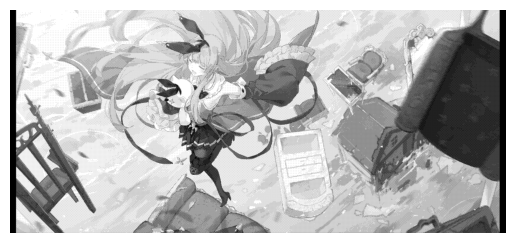

In [ ]:
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import numpy as np
img=Image.open('kou.jpg')
img=ImageOps.grayscale(img)#imageOps提供轉灰階的函數
width,height=img.size
print(width,height)
OriginalImage=np.asarray(img)#use numpy to read image to 2 dimension matrix
HalfToneImage = np.zeros((height,width), dtype=np.uint8)
DitherArray =[
 [0.513,0.272,0.724,0.483,0.543,0.302,0.694,0.453],
 [0.151,0.755,0.091,0.966,0.181,0.758,0.121,0.936],
 [0.634,0.392,0.574,0.332,0.664,0.423,0.604,0.362],
 [0.060,0.875,0.211,0.815,0.030,0.906,0.241,0.845],
 [0.543,0.302,0.694,0.453,0.513,0.272,0.724,0.483],
 [0.181,0.758,0.121,0.936,0.151,0.755,0.091,0.936],
 [0.664,0.423,0.604,0.362,0.634,0.392,0.574,0.332],
 [0.030,0.906,0.241,0.845,0.060,0.875,0.211,0.815]]
tempnumber=0.0
for i in range(0,height,8):
  for j in range(0,width,8):
    for x in range(8):
      for y in range(8):
        if(i+x<height and j+y<width):
          tempnumber = OriginalImage[i+x][j+y]/255.0;
          if (tempnumber<DitherArray[x][y]):
            HalfToneImage [i+x][j+y]=0;
          else:
            HalfToneImage [i+x][j+y]=255;
#print(HalfToneImage)
data = Image.fromarray(np.uint8(HalfToneImage))
plt.imshow(data,cmap='gray')
data=data.save('kou3.jpg')
plt.axis('off')

2400 1080


(-0.5, 2399.5, 1079.5, -0.5)

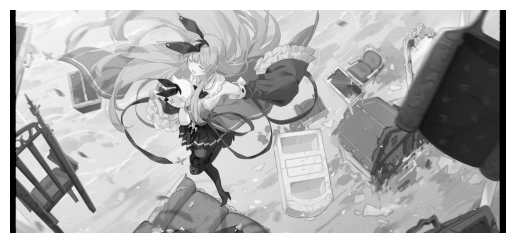

In [ ]:
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import numpy as np
img=Image.open('kou.jpg')
img=ImageOps.grayscale(img)#imageOps提供轉灰階的函數
width,height=img.size
print(width,height)
OriginalImage=np.asarray(img)#use numpy to read image to 2 dimension matrix
HalftoneImage = np.zeros((height,width), dtype=np.uint8)
errorarry=[[0.0,0.0,0.0,0.19040,0.095230],
		  [0.04762,0.095230,0.19040, 0.095230,0.04762],
		  [0.02381,0.047620,0.095230,0.047620,0.02381]]
for i in range(height):
  for j in range(width):
    HalftoneImage[i][j] = OriginalImage[i][j]

for i in range(height):
  for j in range(width):
    if (HalftoneImage[i][j] < 128):
      errorvalue = (HalftoneImage[i][j]-0)
      HalftoneImage[i][j]=0
    else:
      errorvalue = (HalftoneImage[i][j]-255);
      HalftoneImage[i][j]=255;

    for x in range(3):
      if ((i+x)<0 or (i+x)>=height):#check x(height) boundary
        continue
      for y in range(-2,3):
        if ((j+y)<0 or (j+y)>=width):#check y(width) boundary
          continue
        if (errorarry[x][y+2]==0):
          continue
        Weightvalue = (errorarry[x][y+ 2]*errorvalue)
        HalftoneImage[i+x][j+y]=HalftoneImage[i+x][j+y]+Weightvalue
data = Image.fromarray(np.uint8(HalftoneImage))
plt.imshow(data,cmap='gray')
data=data.save('kou4.jpg')
plt.axis('off')

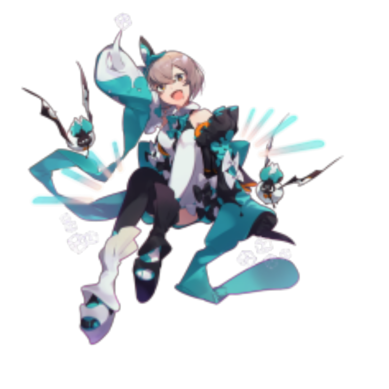

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import io
from skimage.transform import downscale_local_mean,resize

image = io.imread("900px-Partner_ayu_awaken.png")
w, h ,channel= image.shape
image_np = np.array(image)
#downscale會回傳float
image_pixelated = downscale_local_mean(image_np, (4, 4, 1))#長寬除n

# Convert back to uint8 and PIL image
image_pixelated= np.uint8(image_pixelated)

image_resized = resize(image_pixelated, (w, h), anti_aliasing=True)
image_resized = (image_resized * 255).astype(np.uint8)#convert float to 0-255

io.imsave('pixel_resized.png',image_resized)
plt.imshow(image_resized)
plt.axis('off')  # Turn off axis for a cleaner view
plt.show()


900 900 4


(-0.5, 899.5, 899.5, -0.5)

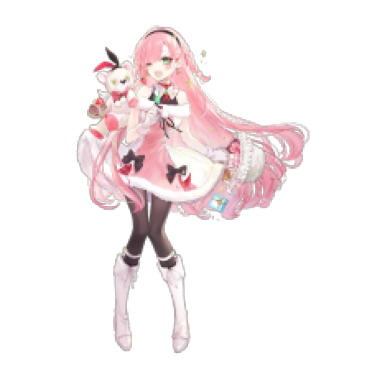

In [ ]:
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import numpy as np
img=Image.open('900px-Partner_kou_winter.png')
img =np.array(img)
w,h,channel=img.shape
print(w,h,channel)
n=4
for i in range(0,w,n):#try to get pixel style?
  for j in range(0,h,n):
    sum = np.zeros(channel)#rgb image has 3 channel
    for x in range(n):#get average of 16 pixel
      for y in range(n):
        if(i+x<w and j+y<h):
          sum+=img[i+x][j+y]
    sum/=n*n
    for x in range(n):
      for y in range(n):
        if(i+x<w and j+y<h):
          img[i+x][j+y]=sum
data = Image.fromarray(np.uint8(img))
plt.imshow(data)
data=data.save('pixel.png')
plt.axis('off')


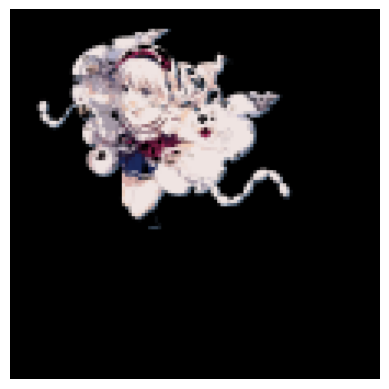

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 加載圖像
img = Image.open('900px-Partner_hikari_summer.png')
img = np.array(img)

# 定義顏色量化函數
def quantize_image(image, num_colors):
    img = Image.fromarray(image)
    img = img.convert('P', palette=Image.ADAPTIVE, colors=num_colors)
    img = img.convert('RGB')  # 將調色板圖像轉換回RGB
    return np.array(img)

# 定義像素化函數
def pixelate(image, pixel_size):
    w, h, channel = image.shape
    new_image = np.zeros_like(image)

    for i in range(0, w, pixel_size):
        for j in range(0, h, pixel_size):
            block = image[i:i+pixel_size, j:j+pixel_size]

            # 確保不越界
            if block.shape[0] > 0 and block.shape[1] > 0:
                avg_color = block.mean(axis=(0, 1)).astype(np.uint8)  # 確保為整數

                new_image[i:i+pixel_size, j:j+pixel_size] = avg_color

    return new_image

# 量化顏色和像素化
num_colors = 16  # 限制的顏色數量
pixel_size = 8   # 像素塊大小
quantized_img = quantize_image(img, num_colors)
pixelated_img = pixelate(quantized_img, pixel_size)

# 顯示和保存圖像
data = Image.fromarray(np.uint8(pixelated_img))
plt.imshow(data)
plt.axis('off')
plt.show()
data.save('pixel_ai.png')


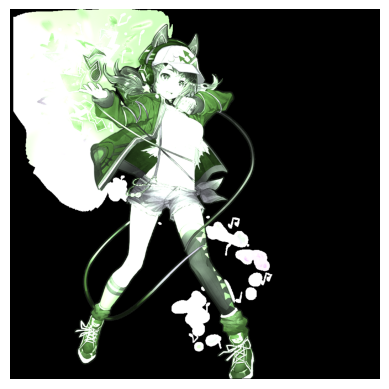

In [ ]:
from PIL import Image
from numpy import matlib
import matplotlib.pyplot as plt
import numpy as np

def apply_color_matrix(image_path, output_path, color_matrix):
    # Open the image
    image = Image.open(image_path).convert('RGB')
    # Get image dimensions
    width, height = image.size

    # Convert image to numpy array
    image_array = np.array(image)

    # Flatten the array to apply the color matrix
    flat_array = image_array.reshape((-1, 3))#-1 will count tehe size automatically,3 是有3列，每個元素內是一個大小為3的list

    # Apply the color matrix
    transformed_array = np.dot(flat_array, color_matrix.T)

    # Clip the values to be in the valid range [0, 255]
    transformed_array = np.clip(transformed_array, 0, 255).astype(np.uint8)

    # Reshape the array back to image shape
    transformed_image = transformed_array.reshape((height, width, 3))

    # Convert the numpy array back to an image
    output_image = Image.fromarray(transformed_image, 'RGB')
    plt.imshow(output_image)
    plt.axis('off')
    plt.show()
    # Save the image
    output_image.save(output_path)

# Example usage
color_matrix = np.array([
    [0.388, 0.701, 0.873,], # Red channel transformation
    [0.688, 0.965, 0.658,], # Green channel transformation
    [0.253, 0.759, 0.969]  # Blue channel transformation
])

apply_color_matrix("900px-Partner_nono.png", 'output_image.jpg', color_matrix)


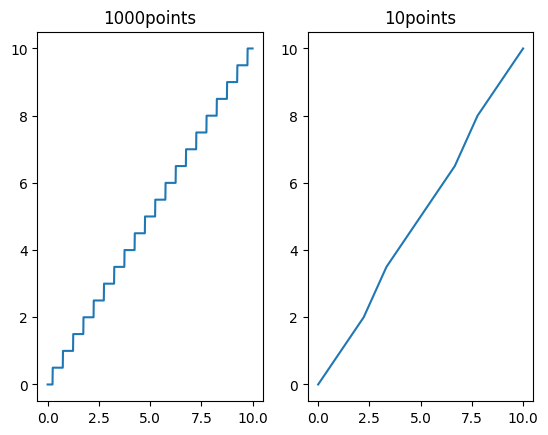

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
q=0.5
x1=np.linspace(0,10,1000)#0~10間產生1000個點
x2=np.linspace(0,10,10)#0~10間產生10個點
y1=q*np.round(x1/q)
y2=q*np.round(x2/q)#round四捨五入
fig,axes =plt.subplots(1,2)
axes[0].plot(x1,y1)
axes[0].set_title('1000points')
axes[1].plot(x2,y2)
axes[1].set_title('10points')
plt.show()

In [ ]:
import numpy as np
from skimage import img_as_ubyte
y=img_as_ubyte(16*np.reshape(range(16),(4,4)))#reshape將[0,...,16]改成4*4的二維矩陣
print(y)


[[  0  16  32  48]
 [ 64  80  96 112]
 [128 144 160 176]
 [192 208 224 240]]


/usr/local/lib/python3.10/dist-packages/skimage/util/dtype.py:576: UserWarning: Downcasting int64 to uint8 without scaling because max value 240 fits in uint8
  return _convert(image, np.uint8, force_copy)


[[  0 128   0 ... 128   0 128]
 [192  64 192 ...  64 192  64]
 [  0 128   0 ... 128   0 128]
 ...
 [192  64 192 ...  64 192  64]
 [  0 128   0 ... 128   0 128]
 [192  64 192 ...  64 192  64]]


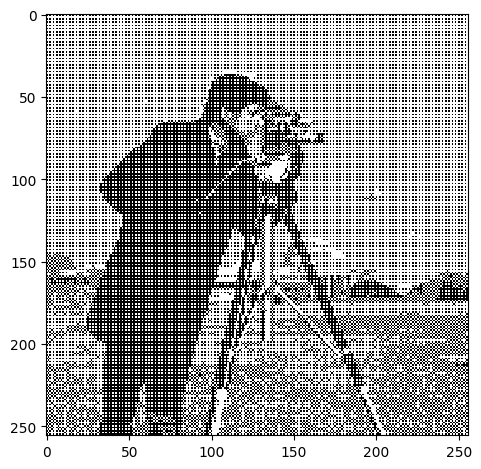

In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import numpy.matlib
img=io.imread('cameraman.tif')
io.imshow(img)
D=np.array([[0,128],[192,64]])
r=np.matlib.repmat(D,img.shape[0]//2,img.shape[1]//2)
print(r)
x2=img>r
io.imshow(x2)

[[1.83529412 1.87058824 1.85882353 ... 1.77647059 1.78823529 1.78823529]
 [1.88235294 1.81176471 1.84705882 ... 1.81176471 1.82352941 1.8       ]
 [1.83529412 1.87058824 1.85882353 ... 1.77647059 1.78823529 1.78823529]
 ...
 [1.34117647 1.55294118 1.44705882 ... 1.58823529 1.61176471 1.34117647]
 [1.42352941 1.48235294 1.52941176 ... 1.56470588 1.52941176 1.32941176]
 [1.42352941 1.48235294 1.52941176 ... 1.56470588 1.52941176 1.32941176]]
-----------------------
[[1.83529412 1.87058824 1.85882353 ... 1.77647059 1.78823529 1.78823529]
 [1.88235294 1.81176471 1.84705882 ... 1.81176471 1.82352941 1.8       ]
 [1.83529412 1.87058824 1.85882353 ... 1.77647059 1.78823529 1.78823529]
 ...
 [1.34117647 1.55294118 1.44705882 ... 1.58823529 1.61176471 1.34117647]
 [1.42352941 1.48235294 1.52941176 ... 1.56470588 1.52941176 1.32941176]
 [1.42352941 1.48235294 1.52941176 ... 1.56470588 1.52941176 1.32941176]]


/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


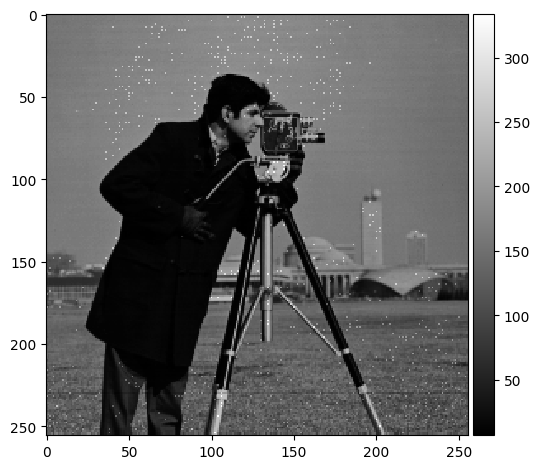

In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import numpy.matlib
img=io.imread('cameraman.tif')
io.imshow(img)
D=np.array([[0,128],[1192,64]])
r=np.matlib.repmat(D,img.shape[0]//2,img.shape[1]//2)#4皆灰階影像
q=img/85
print(q)
x4=q+(img-85*q>r)
print("-----------------------")
print(x4)
io.imshow(x4*85,cmap='gray')

[[4.21621622 4.2972973  4.27027027 ... 4.08108108 4.10810811 4.10810811]
 [4.32432432 4.16216216 4.24324324 ... 4.16216216 4.18918919 4.13513514]
 [4.21621622 4.2972973  4.27027027 ... 4.08108108 4.10810811 4.10810811]
 ...
 [3.08108108 3.56756757 3.32432432 ... 3.64864865 3.7027027  3.08108108]
 [3.27027027 3.40540541 3.51351351 ... 3.59459459 3.51351351 3.05405405]
 [3.27027027 3.40540541 3.51351351 ... 3.59459459 3.51351351 3.05405405]]


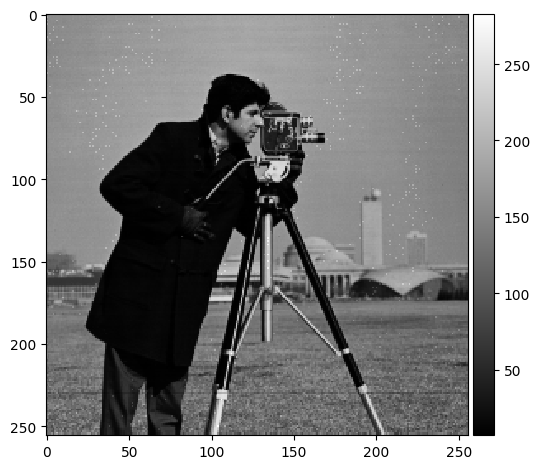

In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import numpy.matlib
img=io.imread('cameraman.tif')
io.imshow(img)
D=np.array([[0,24],[36,12]])
r=np.matlib.repmat(D,img.shape[0]//2,img.shape[1]//2)#8皆灰階影像
q=img/37
print(q)
x8=q+(img-37*q>r)
io.imshow(x8*37,cmap='gray')

[[[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 ...

 [[ 84  18  60]
  [ 84  18  60]
  [ 92  27  58]
  ...
  [173  73  84]
  [172  68  76]
  [177  62  79]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]]
-------------------
[[[192 128  64]
  [192 128  64]
  [192 128 128]
  ...
  [192 128  64]
  [192 128  64]
  [192  64  64]]

 [[192 128  64]
  [192 128  64]
  [192 128 128]
  ...
  [192 128  64]
  [192 128  64]
  [192  64  64]]

 [[192 128  64]
  [192 128  64]
  [192 128 128]
  ...
  [192 128  64]
  [192 128  64]
  [192  64  64]]

 ...

 [[ 64   0   0]
  [ 64   0   0]


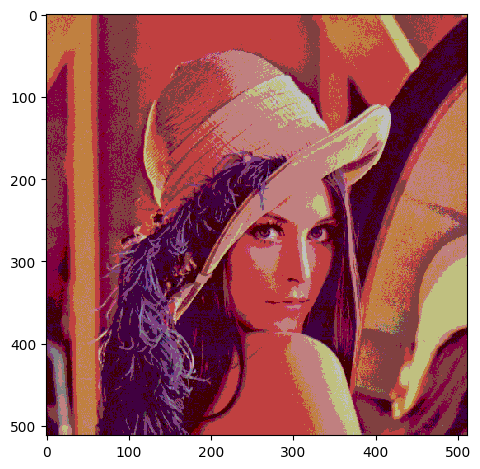

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('test.png')
img = np.array(img)
print(img)
img=img//64
img*=64
print("-------------------")
print(img)
io.imshow(img)


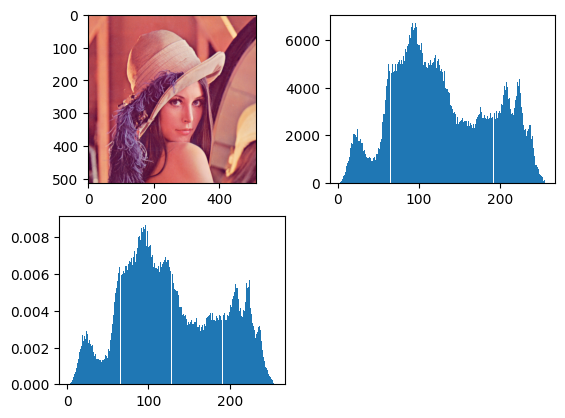

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('test.png')
img=np.array(img)

plt.subplot(2,2,1)
plt.imshow(img)
plt.subplot(2,2,2)
plt.hist(img.flatten(),bins=256)
plt.subplot(2,2,3)
plt.hist(img.flatten(),bins=256,density=True)
plt.show()#hist用於繪製值方圖,bin是柱子數,flatten將2維陣列轉為一維
#

值方圖擴展法

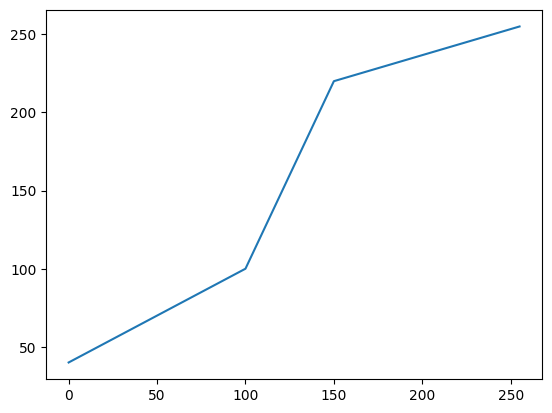

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array([0, 100, 150, 255])
b = np.array([40,100, 220, 255])

lin = np.interp(range(256), a, b)#np.interp() 函數來進行線性插值
x = range(256)

#f = plt.figure()
#f.show(plt.plot(x,lin))
plt.plot(x,lin)

gamma值處裡


Text(0.5, 1.0, 'gamma=2')

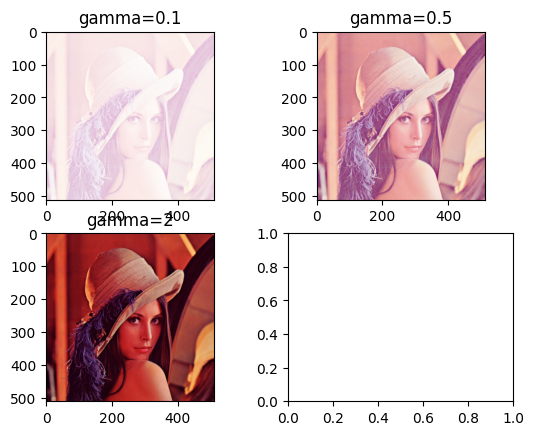

In [ ]:
from skimage import io
import skimage.exposure as ex

img = io.imread('test.png')
cal = ex.adjust_gamma(img, 0.1)
ca2 = ex.adjust_gamma(img, 0.5)
ca3 = ex.adjust_gamma(img, 2.0)
fig, axes = plt.subplots(nrows=2, ncols=2)
ax = axes.ravel()
ax[0].imshow(cal,)
ax[0].set_title("gamma=0.1")
ax[1].imshow(ca2,)
ax[1].set_title("gamma=0.5")
ax[2].imshow(ca3,)
ax[2].set_title("gamma=2")


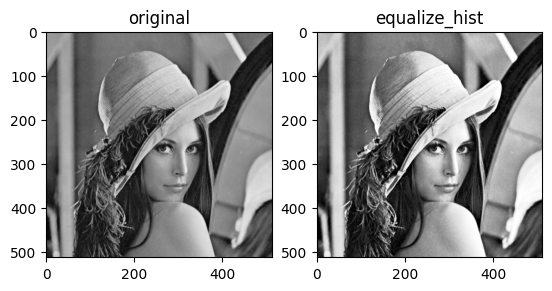

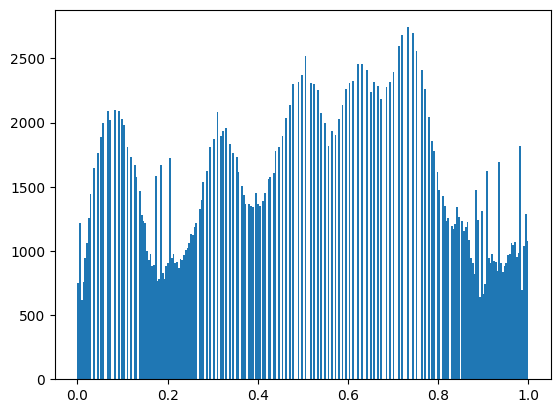

In [ ]:
from skimage import io
import skimage.exposure as ex
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('test.png')
img = np.array(img.convert('L'))
cal = ex.equalize_hist(img)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()
ax[0].imshow(img,cmap='gray')
ax[0].set_title("original")
ax[1].imshow(cal,cmap='gray')
ax[1].set_title("equalize_hist")

f= plt.figure()
f.show(plt.hist(cal.flatten(), bins =256))

線性濾波器

In [ ]:
import numpy as np
x = [[170, 240, 10, 80, 150],
     [230, 50, 70, 140, 160],
     [40, 60, 130, 200, 220],
     [100, 200, 190, 210, 30],
     [110, 180, 250, 20, 90]]
x = np.array(x, dtype=np.uint8)
mask=np.ones((3,3))/9
print(mask)
row,col=x.shape
result=np.zeros((row,col))
for i in range(1 , row-1):
  for j in range(1,col-1):
    result[i,j]=np.sum(x[i-1:i+2,j-1:j+2]*mask)
print(result)


[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[  0.           0.           0.           0.           0.        ]
 [  0.         111.11111111 108.88888889 128.88888889   0.        ]
 [  0.         118.88888889 138.88888889 150.           0.        ]
 [  0.         140.         160.         148.88888889   0.        ]
 [  0.           0.           0.           0.           0.        ]]


python的濾波函數

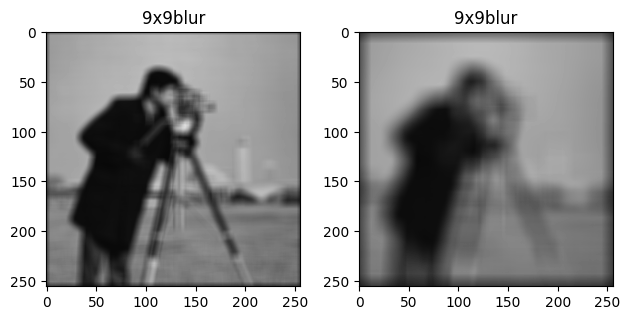

In [37]:
from skimage import io
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
img=io.imread('cameraman.tif')
mask=np.ones((9,9))/81

result = ndi.convolve(img,mask,mode='constant')
result2 = ndi.uniform_filter(img,[25,25],mode='constant')
plt.subplot(1,2,1)
plt.subplot(1,2,1).set_title('9x9blur')
io.imshow(result)
plt.subplot(1,2,2).set_title('25x25blur')
io.imshow(result2)

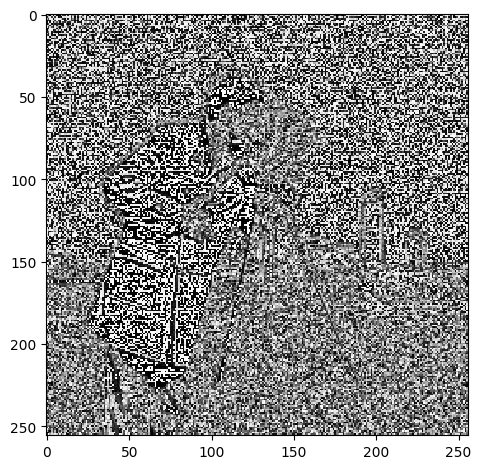

In [ ]:
from skimage import io
import scipy.ndimage as ndi
import numpy as np
img = io.imread('cameraman.tif')
mask = np.array([[1,4,1],[4,-20,4],[1,4,1]])
result = ndi.convolve(img,mask)
io.imshow(result)

[[156 159 158 ... 151 152 152]
 [160 154 157 ... 154 155 153]
 [156 159 158 ... 151 152 152]
 ...
 [114 132 123 ... 135 137 114]
 [121 126 130 ... 133 130 113]
 [121 126 130 ... 133 130 113]]
<class 'numpy.ndarray'>


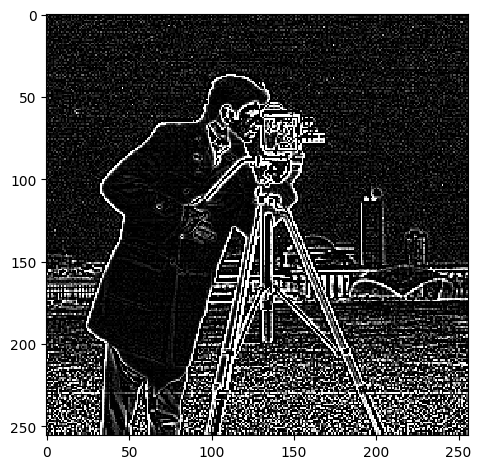

In [ ]:
from skimage import io
import scipy.ndimage as ndi
import numpy as np
img = io.imread('cameraman.tif')
print(img)
img = img.astype(float)#use float to prevent overflow
mask = np.array([[1,4,1],[4,-20,4],[1,4,1]])
result = ndi.convolve(img,mask)
result = np.clip(result, 0, 255).astype(np.uint8)
io.imshow(result)

laplacian濾波器

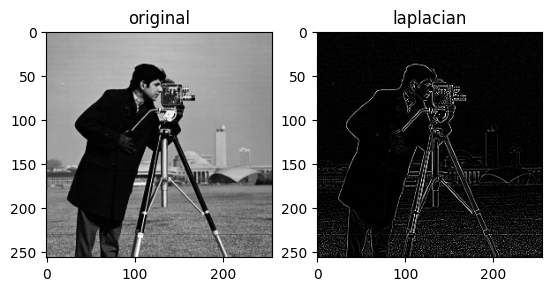

In [39]:
from skimage import io
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
img = io.imread('cameraman.tif')
img =img.astype(float)
result = ndi.laplace(img)
result = np.clip(result, 0, 255).astype(np.uint8)
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121) # left side
ax2 = fig.add_subplot(122) # right side
ax1.set_title('original')
ax2.set_title('laplacian')
ax1.imshow(img)
ax2.imshow(result)
plt.show()

高通、低通濾波器

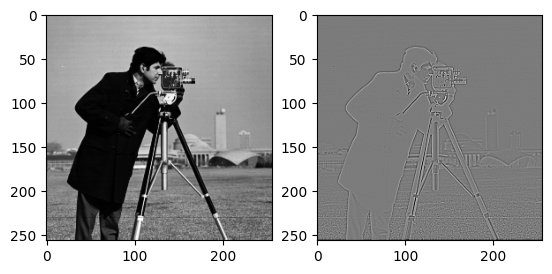

In [10]:
from skimage import io,img_as_float
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import numpy as np
img = io.imread('cameraman.tif')
mask = np.array([[1,4,1],[4,-20,4],[1,4,1]])
img = img_as_float(img)
result = ndi.convolve(img,mask,mode='constant')
maxres = result.max()
minres = result.min()
result = (result-minres) /(maxres-minres)

fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(img)
ax2.imshow(result, vmax=1.0,vmin=0.0)
plt.show()


高斯濾波器

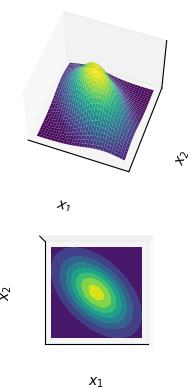

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)
# plot using subplots
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1,projection='3d')
ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.viridis)
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')
ax2 = fig.add_subplot(2,1,2,projection='3d')
ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.viridis)
ax2.view_init(90, 270)
ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')
plt.show()

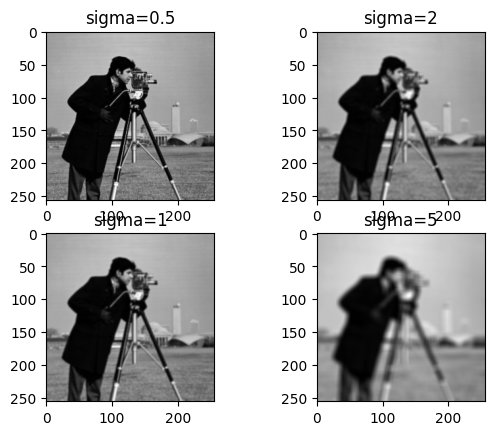

In [40]:
from skimage import io
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

img = io.imread('cameraman.tif')

result1 = ndi.gaussian_filter(img,0.5,truncate = 4.5)
result2 = ndi.gaussian_filter(img,2,truncate = 1)
result3 = ndi.gaussian_filter(img,1,truncate = 5)
result4 = ndi.gaussian_filter(img,5,truncate = 1)

fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(221)  # left side
ax2 = fig.add_subplot(222)  # right side
ax3 = fig.add_subplot(223)  # left side
ax4 = fig.add_subplot(224)  # right side
ax1.imshow(result1)
ax1.set_title('sigma=0.5')
ax2.imshow(result2)
ax2.set_title('sigma=2')
ax3.imshow(result3)
ax3.set_title('sigma=1')
ax4.imshow(result4)
ax4.set_title('sigma=5')
plt.show()

邊緣銳利化

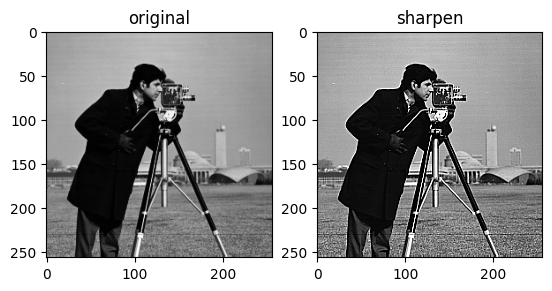

In [41]:
from skimage import io
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

k = io.imread('cameraman.tif')
u = np.array([[-2.0,-2.0,-2.0],[-2.0,25.0,-2.0],[-2.0,-2.0,-2.0]]) /9
result = ndi.convolve(k.astype(float),u)#綠波操作
#result =np.clip(result,0,255).astype(np.uint8)
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.set_title('original')
ax2.set_title('sharpen')
ax1.imshow(k)
#ax2.imshow(result)
ax2.imshow(result/255,vmax=1.0,vmin=0.0)

plt.show()

高增幅濾波器

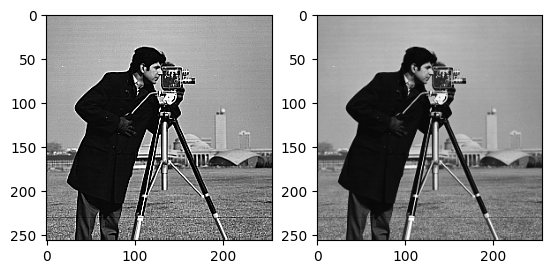

In [32]:
from skimage import io
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

k = io.imread('cameraman.tif')

kf=ndi.uniform_filter(k,3)#均值濾波器
hb1 = 3.0*k-2.0*kf
hb2 = 1.25*k-0.25*kf
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side 邊緣較銳利
ax2 = fig.add_subplot(122)  # right side 去銳利化

ax1.imshow(hb1/255,vmax=1.0,vmin=0.0)
ax2.imshow(hb2/255,vmax=1.0,vmin=0.0)

plt.show()

最大、最小濾波器

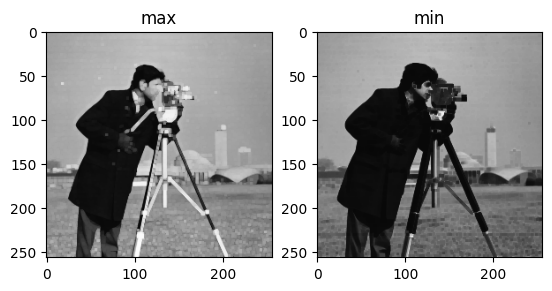

In [42]:
from skimage import io
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

c = io.imread('cameraman.tif')

cmax=ndi.generic_filter(c,max,[3,3])

cmin=ndi.generic_filter(c,min,[3,3])
fig = plt.figure()
ax1 = fig.add_subplot(121)  # left side 邊緣較銳利
ax2 = fig.add_subplot(122)  # right side 去銳利化

ax1.imshow(cmax/255,vmax=1.0,vmin=0.0)
ax2.imshow(cmin/255,vmax=1.0,vmin=0.0)
ax1.set_title('max')
ax2.set_title('min')
plt.show()

中值濾波器

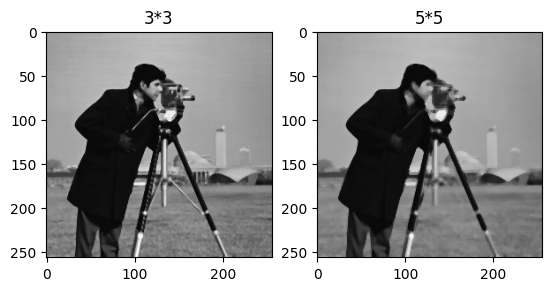

In [44]:
from skimage import io
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

c = io.imread('cameraman.tif')
cm=ndi.median_filter(c,size=[3,3])#以3*3的範圍尋找median
cm2=ndi.median_filter(c,size=[5,5])
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.set_title('3*3')
ax2.set_title('5*5')
ax1.imshow(cm/255,vmax=1.0,vmin=0.0)
ax2.imshow(cm2/255,vmax=1.0,vmin=0.0)

plt.show()

kawahara濾波器

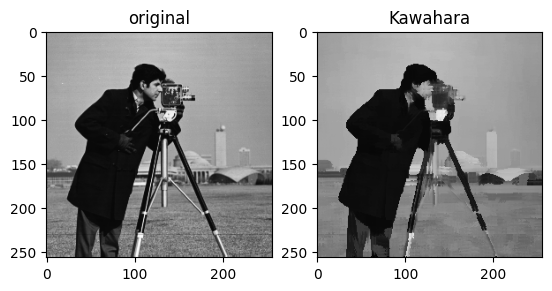

In [47]:
from skimage import io
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

def Kuwahara(original, winsize):
    image = original.astype(np.float64)
    # make sure window size is correct
    if winsize %4 != 1:
        raise Exception ("Invalid winsize %s: winsize must follow formula: w = 4*n+1." %winsize)

    #Build subwindows
    tmpAvgKerRow = np.hstack((np.ones((1,(winsize-1)//2+1)),np.zeros((1,(winsize-1)//2))))
    tmpPadder = np.zeros((1,winsize))
    tmpavgker = np.tile(tmpAvgKerRow, ((winsize-1)//2+1,1))
    tmpavgker = np.vstack((tmpavgker, np.tile(tmpPadder, ((winsize-1)//2,1))))
    tmpavgker = tmpavgker/np.sum(tmpavgker)

    # tmpavgker is a 'north-west' subwindow (marked as 'a' above)
    # we build a vector of convolution kernels for computing average and
    # variance
    avgker = np.empty((4,winsize,winsize)) # make an empty vector of arrays
    avgker[0] = tmpavgker			# North-west (a)
    avgker[1] = np.fliplr(tmpavgker)	# North-east (b)
    avgker[2] = np.flipud(tmpavgker)	# South-west (c)
    avgker[3] = np.fliplr(avgker[2])	# South-east (d)

    # Create a pixel-by-pixel square of the image
    squaredImg = image**2
    # preallocate these arrays to make it apparently %15 faster
    avgs = np.zeros([4, image.shape[0],image.shape[1]])
    stddevs = avgs.copy()

    # Calculation of averages and variances on subwindows
    for k in range(4):
        # mean on subwindow
        avgs[k] = convolve2d(image, avgker[k],mode='same')
        # mean of squares on subwindow
        stddevs[k] = convolve2d(squaredImg, avgker[k],mode='same')
        # variance on subwindow
        stddevs[k] = stddevs[k]-avgs[k]**2
   # Choice of index with minimum variance
    indices = np.argmin(stddevs,0) # returns index of subwindow with smallest variance

    # Building the filtered image (with nested for loops)
    filtered = np.zeros(original.shape)
    for row in range(original.shape[0]):
        for col in range(original.shape[1]):
            filtered[row,col] = avgs[indices[row,col], row,col]

    #filtered=filtered.astype(np.uint8)
    return filtered.astype(np.uint8)
c = io.imread('cameraman.tif')

cK=Kuwahara(c,9)


fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side

ax1.imshow(c/255,vmax=1.0,vmin=0.0)
ax2.imshow(cK/255,vmax=1.0,vmin=0.0)
ax1.set_title('original')
ax2.set_title('Kawahara')
plt.show()


雙邊濾波器

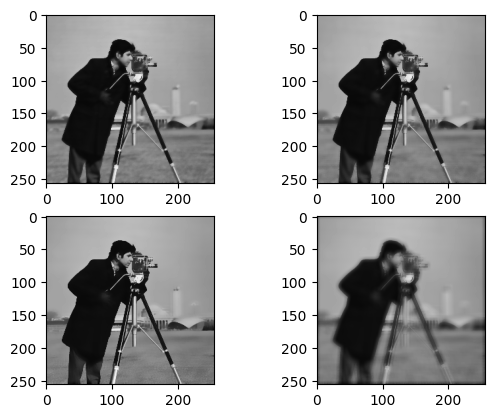

In [54]:
from skimage import io
import skimage.restoration as re
import matplotlib.pyplot as plt
c = io.imread('cameraman.tif')
cb1 = re.denoise_bilateral(c,win_size =5,sigma_color=0.2,sigma_spatial = 2,)
cb2 = re.denoise_bilateral(c,win_size =7,sigma_color=0.2,sigma_spatial = 10,)
cb3 = re.denoise_bilateral(c,win_size =11,sigma_color=0.1,sigma_spatial = 3,)
cb4 = re.denoise_bilateral(c,win_size =11,sigma_color=0.5,sigma_spatial = 5,)
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(221)  # left side
ax2 = fig.add_subplot(222)  # right side
ax3 = fig.add_subplot(223)  # left side
ax4 = fig.add_subplot(224)  # right side

ax1.imshow(cb1,vmax=1.0,vmin=0.0)
ax2.imshow(cb2,vmax=1.0,vmin=0.0)
ax3.imshow(cb3,vmax=1.0,vmin=0.0)
ax4.imshow(cb4,vmax=1.0,vmin=0.0)

plt.show()




感興趣區域處理

226 170


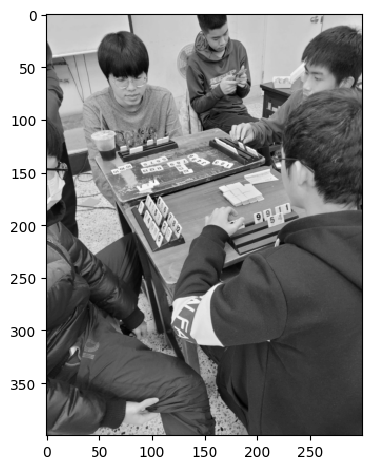

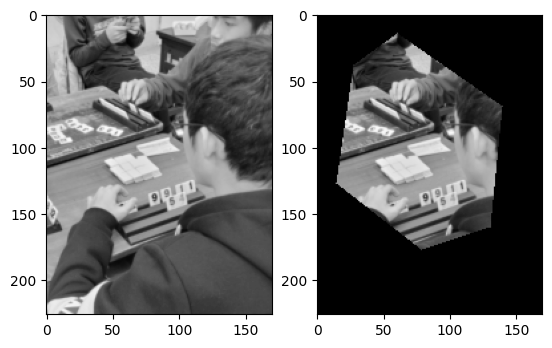

In [80]:
from skimage import io
from skimage.draw import polygon
from skimage import filters
from skimage.transform import resize
from skimage.util import img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt

l = io.imread('highschool.jpg', as_gray=True)
l = resize(l, (400, 300), anti_aliasing=True)
io.imshow(l)
# 定義影像區域
m = l[55:281, 120:290]
r, c = m.shape
print(r, c)
xi = np.array([60, 27, 14, 78, 130, 139])
yi = np.array([14, 38, 127, 177, 160, 69])

roi = np.zeros_like(m)
r, c = polygon(yi, xi)
# Swap r and c for indexing
roi[r, c] = 1 # The error was because the row (r) and column (c) coordinates were being used incorrectly during indexing

lg = img_as_ubyte(filters.gaussian(m, sigma=0.4))
lr = lg * roi + m * (1 - roi)
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side

ax1.imshow(lg / 255, vmax=1.0, vmin=0.0)
ax2.imshow(lr / 255, vmax=1.0, vmin=0.0)